# Week 7 Homework
    - random sampling
    - linear regression
    - train and test groups

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression

## Problem 1: NYC Restaurants Dataset

In [2]:
nyc = pd.read_csv('nyc.txt', sep = '\t')
nyc.head(10)

,Price,Food,Decor,Service,Wait,East
0,43,22,18,20,36,0
1,32,20,19,19,22,0
2,34,21,13,18,20,0
3,41,20,20,17,25,0
4,54,24,19,21,32,0
5,52,22,22,21,15,0
6,34,22,16,21,25,0
7,34,20,18,21,21,1
8,39,22,19,22,23,1
9,44,21,17,19,27,1


In [3]:
X1 = nyc.iloc[:, 1:].values
y1 = nyc.iloc[:, 0].values

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X1, y1,\
test_size = 0.2, random_state = 1)
print(f' Training Features Shape: {X_train_1.shape}\
\n Test Features Shape:     {X_test_1.shape}')

 Training Features Shape: (134, 5)
 Test Features Shape:     (34, 5)


In [4]:
nyc_mod = LinearRegression()
nyc_mod.fit(X_train_1, y_train_1)
print(f' Intercept:    {nyc_mod.intercept_}\n Coefficients: {nyc_mod.coef_}')

 Intercept:    -23.755435322488893
 Coefficients: [ 1.55693926  2.00700907 -0.25440527  0.09203064  2.63235537]


In [5]:
print(f' Training r-Squared: {round((nyc_mod.score(X_train_1, y_train_1)),4)}\
\n Testing r-Squared:  {round((nyc_mod.score(X_test_1, y_test_1)), 4)}')

 Training r-Squared: 0.6306
 Testing r-Squared:  0.6245


In [6]:
test_pred_1 = nyc_mod.predict(X_test_1)
print(f' Observed Prices: {np.round(y_test_1[:10], 2)} \n Observed Prices: {np.round(test_pred_1[:10], 2)}')

 Observed Prices: [33 45 54 38 22 47 38 51 46 47] 
 Observed Prices: [39.2  38.09 49.35 39.26 19.72 47.4  36.85 50.07 48.26 43.01]


In [7]:
# I tried to extract column names from the arrays but this is not permitted.
nyc_new = pd.DataFrame([[22, 12, 20, 15, 0], [18, 19, 22, 34, 1], \
[25, 22, 18, 36, 0]], columns = ['Food', 'Decor', 'Service', 'Wait', 'East'])

new_pred_1 = nyc_mod.predict(nyc_new)
print(f'Estimated Prices: {np.round(new_pred_1, 2)}')

Estimated Prices: [30.87 42.57 58.06]


C:\Users\mmsax\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


### Problem 2: Diamonds Dataset

In [8]:
diamonds = pd.read_csv('diamonds.txt', sep = '\t')
diamonds.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [9]:
diamonds['ln_carat'] = np.log(diamonds['carat'])
diamonds['ln_price'] = np.log(diamonds['price'])
diamonds.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z,ln_carat,ln_price
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,-1.469676,5.786897
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,-1.560648,5.786897
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,-1.469676,5.789960
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,-1.237874,5.811141
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,-1.171183,5.814131


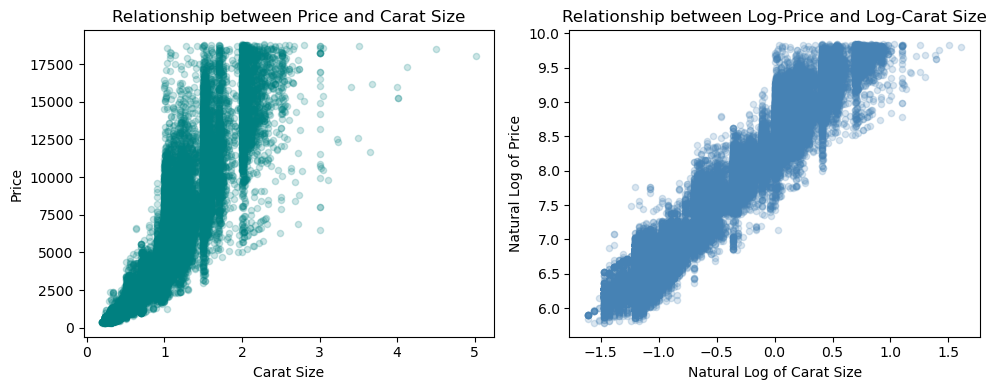

In [10]:
plt.figure(figsize = [10, 4])

plt.subplot(1, 2, 1)
plt.scatter(diamonds['carat'], diamonds['price'], s = 20, alpha = 0.2, color = 'teal')
plt.title('Relationship between Price and Carat Size')
plt.xlabel('Carat Size')
plt.ylabel('Price')

plt.subplot(1, 2, 2)
plt.scatter(diamonds['ln_carat'], diamonds['ln_price'], s = 20, alpha = 0.2, color = 'steelblue')
plt.title('Relationship between Log-Price and Log-Carat Size')
plt.xlabel('Natural Log of Carat Size')
plt.ylabel('Natural Log of Price')

plt.tight_layout()
plt.show()

In [11]:
# Using this code gave me the following error so I used reshape.  
# I'm still a bit confused why this doesn't work.

#  ValueError: Expected 2D array, got 1D array instead:
#  array=[-0.32850407 -0.91629073 -0.27443685 ... -0.09431068  0.16551444
#  -1.13943428].
#  Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

# X2 = diamonds.loc[:, 'ln_carat'].values
# y2 = diamonds.loc[:, 'ln_price'].values
# X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X2, y2, test_size = 0.1, random_state = 1)
# print(f' Training Features Shape: {X_train_2.shape}\
#      \n Test Features Shape:     {X_test_2.shape}')
# print(type(X2))
# print(type(y2))

In [12]:
X2 = diamonds['ln_carat'].values.reshape(-1,1)
y2 = diamonds['ln_price'].values

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X2, y2, test_size = 0.1, random_state = 1)

print(f' Training Features Shape: {X_train_2.shape}\
      \n Test Features Shape:     {X_test_2.shape}')

 Training Features Shape: (48546, 1)      
 Test Features Shape:     (5394, 1)


In [13]:
dia_mod = LinearRegression()
dia_mod.fit(X_train_2, y_train_2)
print(f' Intercept:       {dia_mod.intercept_}\n Coefficents:     {dia_mod.coef_}')

 Intercept:       8.448298621179152
 Coefficents:     [1.67493107]


In [14]:
print(f' Training r-Squared: {round((dia_mod.score(X_train_2, y_train_2)), 4)}\
\n Testing r-Squared:  {round((dia_mod.score(X_test_2, y_test_2)), 4)}')

 Training r-Squared: 0.933
 Testing r-Squared:  0.9328


In [15]:
test_pred_2 = dia_mod.predict(X_test_2)
print(f' Observed Prices:  {np.round(np.exp(y_test_2[:10]), 0)}\
\n Estimated Prices: {np.round(np.exp(test_pred_2[:10]), 0)}')

 Observed Prices:  [ 564. 5914. 2562.  537. 5964.  984. 5247.  611. 9645. 1162.]
 Estimated Prices: [ 729. 6334. 2096.  766. 6334. 1612. 5309. 1048. 9204.  804.]


In [16]:
# I had to use reshape here again
diamonds_new = (np.log([0.5, 1.0, 1.5, 2.0, 2.5, 3.0])).reshape(-1, 1)

new_pred_2 = dia_mod.predict(diamonds_new)
print(f'Estimated Prices: {np.round(np.exp(new_pred_2), 0)}') # instructions had a typo of new_pred_3

Estimated Prices: [ 1462.  4667.  9204. 14902. 21656. 29390.]


### Problem 3: Heart Disease Dataset

In [17]:
hd = pd.read_csv('heart_disease.txt', sep  = '\t')
hd.head(10)

,age,sex,chest_pain_type,resting_bp,serum_chol,fasting_blood_sugar,electrocardio,max_heart_rate,exercise_induced_angina,oldpeak,slope,major_vessels,thal,heart_disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1
5,65,1,4,120,177,0,0,140,0,0.4,1,0,7,1
6,56,1,3,130,256,1,2,142,1,0.6,2,1,6,2
7,59,1,4,110,239,0,2,142,1,1.2,2,1,7,2
8,60,1,4,140,293,0,2,170,0,1.2,2,2,7,2
9,63,0,4,150,407,0,2,154,0,4.0,2,3,7,2


In [18]:
X3 = hd.iloc[: , :13].values
y3 = hd.iloc[: , 13].values

X_train_3, X_test_3, y_train_3, y_test_3 = \
    train_test_split(X3, y3, test_size = 0.2, random_state = 1, stratify = y3)

print(f' Training Features Shape: {X_train_3.shape}\
      \n Test Features Shape:     {X_test_3.shape}')

 Training Features Shape: (216, 13)      
 Test Features Shape:     (54, 13)


In [19]:
hd_mod = LogisticRegression(solver = 'lbfgs', penalty = 'none', max_iter = 839)
hd_mod.fit(X_train_3, y_train_3)
print(f' Intercept:    {hd_mod.intercept_}\n Coefficients:\n {hd_mod.coef_}')

InvalidParameterError: The 'penalty' parameter of LogisticRegression must be a str among {'l1', 'elasticnet', 'l2'} or None. Got 'none' instead.

In [20]:
print(f' Training Accuracy: {np.round(hd_mod.score(X_train_3, y_train_3), 4)}\n \
Testing Accuracy:  {np.round(hd_mod.score(X_test_3, y_test_3), 4)}')

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [21]:
# double check this - 100% correct - this is puzzling considering the accuracy shown above of 0.8148
test_pred_3 = hd_mod.predict(X_test_3)
print(f' Observed Labels:  {y_test_3[:20]}\n Predicted Labels: {test_pred_3[:20]}')

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [22]:
print(pd.DataFrame(hd_mod.predict_proba(X_test_3[:10, :]), columns = ['Class 1' , 'Class 2']))

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

### Problem 4: Gapminder Dataset

In [23]:
gm = pd.read_csv('gapminder_data.txt', sep = '\t')
gm18 = gm[gm['year'] == 2018]
# print(gm18.shape)
gm18.head(10)

,country,year,continent,population,life_exp,gdp_per_cap,gini
40112,Afghanistan,2018,asia,36400000,58.7,1870,36.8
40113,Albania,2018,europe,2930000,78.0,12400,29.0
40114,Algeria,2018,africa,42000000,77.9,13700,27.6
40115,Angola,2018,africa,30800000,65.2,5850,42.6
40116,Antigua and Barbuda,2018,americas,103000,77.6,21000,40.0
40117,Argentina,2018,americas,44700000,77.0,18900,42.4
40118,Armenia,2018,europe,2930000,76.0,8660,32.6
40119,Australia,2018,asia,24800000,82.9,45800,32.3
40120,Austria,2018,europe,8750000,81.8,44600,30.5
40121,Azerbaijan,2018,europe,9920000,72.3,16600,32.4


In [24]:
X4 = gm18.loc[: , ['life_exp', 'gdp_per_cap', 'gini']].values
y4 = gm18.loc[: , 'continent'].values

X_train_4, X_test_4, y_train_4, y_test_4 = \
    train_test_split(X4, y4, test_size = 0.3, random_state = 1, stratify = y4)

print(f' Training Features Shape: {X_train_4.shape}\n Test Features Shape:     {X_test_4.shape}')

 Training Features Shape: (128, 3)
 Test Features Shape:     (56, 3)


In [25]:
gm_mod = LogisticRegression(solver = 'lbfgs', penalty = 'none', \
    multi_class = 'multinomial', max_iter = 259)
gm_mod.fit(X_train_4, y_train_4)

print(f' Intercept:    {gm_mod.intercept_}\n Coefficients:\n {gm_mod.coef_}')

InvalidParameterError: The 'penalty' parameter of LogisticRegression must be a str among {'l1', 'elasticnet', 'l2'} or None. Got 'none' instead.

In [26]:
print(f' Training Accuracy: {np.round(gm_mod.score(X_train_4, y_train_4), 4)}\n \
Testing Accuracy:  {np.round(gm_mod.score(X_test_4, y_test_4), 4)}')

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [27]:
# double check this - this n= 8 sample has an accuracy of 0.375, much lower than the accuracy above of 0.5891
test_pred_4 = gm_mod.predict(X_test_4)
print(f' Observed Labels:  {y_test_4[:8]}\n Predicted Labels: {test_pred_4[:8]}')

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [28]:
print(pd.DataFrame(gm_mod.predict_proba(X_test_4[:10, :]), \
    columns = ['africa' , 'americas', 'asia', 'europe']))

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [29]:
gm_new = pd.DataFrame([[75, 5000, 30], [75, 5000, 40], [75, 5000, 50]\
                        , [75, 20000, 30], [75, 20000, 40], [75, 20000, 50]]\
                     , columns = ['life_exp', 'gdp_per_cap', 'gini'])  
                    # This line could have been left out since it's in the print statement below.
    
print(pd.DataFrame(np.round((gm_mod.predict_proba(gm_new)), 3), \
    columns = ['africa' , 'americas', 'asia', 'europe']))

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

According to our model:  
    - Country 0 is most likely in Europe.  
    - Country 1 is most likely in Africa.  
    - Country 2 is most likely in Africa.  
    - Country 3 is most likely in Europe.  
    - Country 4 is most likely in Asia.  
    - Country 5 is most likely in Americas.